In [2]:
from __future__ import print_function
from scipy.optimize import curve_fit, minimize
import matplotlib.pyplot as plt
import pylab as pl
import seaborn
import random
import numpy as np



%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
distributions = ['chisq','binom','norma', 'poi','geom']
mymean = 100


In [4]:
df = mymean

In [5]:
md = {}
md['chisq'] = np.random.chisquare(df,size = 100)

(array([  2.,   1.,   1.,   1.,   1.,   2.,   0.,   4.,   4.,   8.,   7.,
          3.,   4.,   9.,  12.,   4.,   6.,  10.,   3.,   1.,   4.,   3.,
          3.,   2.,   0.,   1.,   1.,   2.,   0.,   1.]),
 array([  64.80959483,   67.284205  ,   69.75881518,   72.23342535,
          74.70803552,   77.18264569,   79.65725586,   82.13186604,
          84.60647621,   87.08108638,   89.55569655,   92.03030673,
          94.5049169 ,   96.97952707,   99.45413724,  101.92874741,
         104.40335759,  106.87796776,  109.35257793,  111.8271881 ,
         114.30179828,  116.77640845,  119.25101862,  121.72562879,
         124.20023897,  126.67484914,  129.14945931,  131.62406948,
         134.09867965,  136.57328983,  139.0479    ]),
 <a list of 30 Patch objects>)

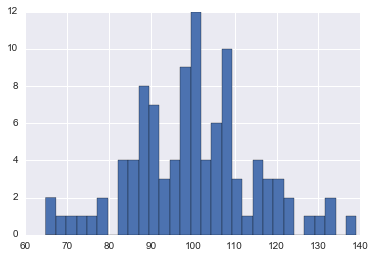

In [6]:
pl.hist(md['chisq'], bins = 30)


In [32]:
mysize = np.random.random_integers(10,2000,100)
print (mysize)

[1188  845 1203 1121 1901  494 1248 1030 1652  680  210  594  159  367  934
  469 1564  171   99  271  140 1442 1349 1729  985 1733  227  403 1954  393
 1864  423 1795  185 1134 1281 1765  709 1474  972  821 1635 1397  706 1906
  888 1454  750   66 1381  516 1640   92   29 1558 1057  433  691  690 1841
  663  273  972  853  879 1885 1188 1362 1395 1643  655  760  630 1686 1457
 1401  872 1203  595 1747 1299  881  403 1070   63 1989 1005  150  482 1721
  996 1184 1397 1419  615 1289  469  459  583 1324]


C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(10, 2000 + 1) instead
  if __name__ == '__main__':


In [67]:
md['chisq'] = {}

In [68]:
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

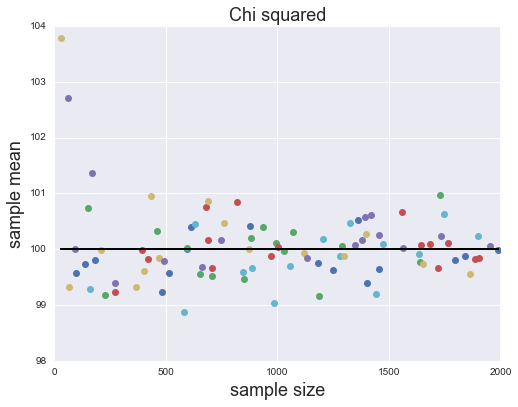

In [69]:
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize = (8,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize = 18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize = 18)
        axchisq_mu_n.set_title('Chi squared', fontsize = 18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df,df], 'k')

In [18]:
allmeans = list(md['chisq']['means'].values())

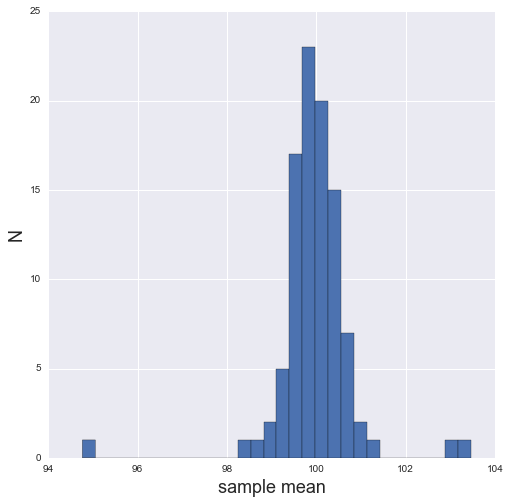

In [20]:
chiSample_n = pl.figure(figsize = (8,8)).add_subplot(111)
chiSample_n.hist(allmeans, bins = 30)

chiSample_n.set_xlabel('sample mean',fontsize = 18)
chiSample_n.set_ylabel('N', fontsize = 18)

(array([  4.,   1.,   3.,   2.,   6.,  12.,  16.,   9.,  12.,  13.,   9.,
          4.,   5.,   1.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([  97.62383822,   97.92059589,   98.21735357,   98.51411125,
          98.81086892,   99.1076266 ,   99.40438428,   99.70114195,
          99.99789963,  100.29465731,  100.59141499,  100.88817266,
         101.18493034,  101.48168802,  101.77844569,  102.07520337,
         102.37196105,  102.66871872,  102.9654764 ,  103.26223408,
         103.55899176]),
 <a list of 20 Patch objects>)

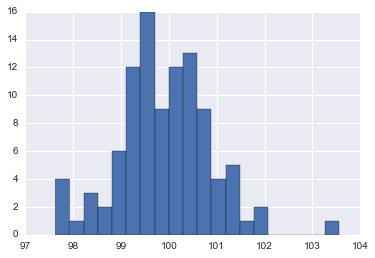

In [71]:
#Normal Distribution
md['norm']= np.random.normal(100,1,100)
plt.hist(md['norm'], bins = 20)


In [28]:
print ("Normal Distribution mean : %.2f, standard deviation : %.2f" % (md['norm'].mean(), md['norm'].std()))

Normal Distribution mean : 100.19, standard deviation : 1.02


In [84]:
md['norm'] = {}

In [85]:
mean = 100
for n in mysize:
    md['norm'][n] = np.random.randn(n) + mean

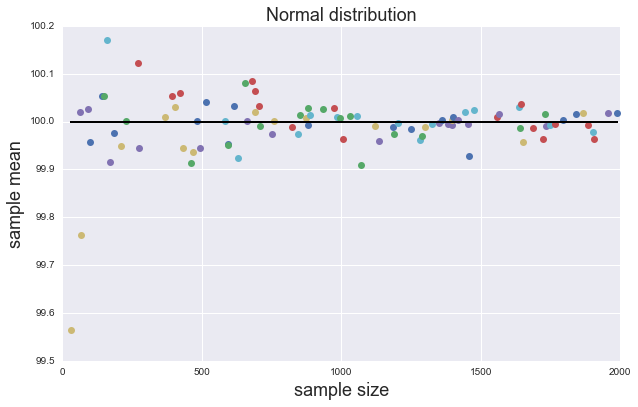

In [86]:
md['norm']['means'] = {}
normal_n = pl.figure(figsize = (10,6)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        
        normal_n.plot(nn, md['norm']['means'][nn], 'o')
        normal_n.set_xlabel('sample size', fontsize = 18)
        normal_n.set_ylabel('sample mean', fontsize =18)
        normal_n.set_title('Normal distribution', fontsize = 18)
        normal_n.plot([min(mysize), max(mysize)], [100, 100], 'k')

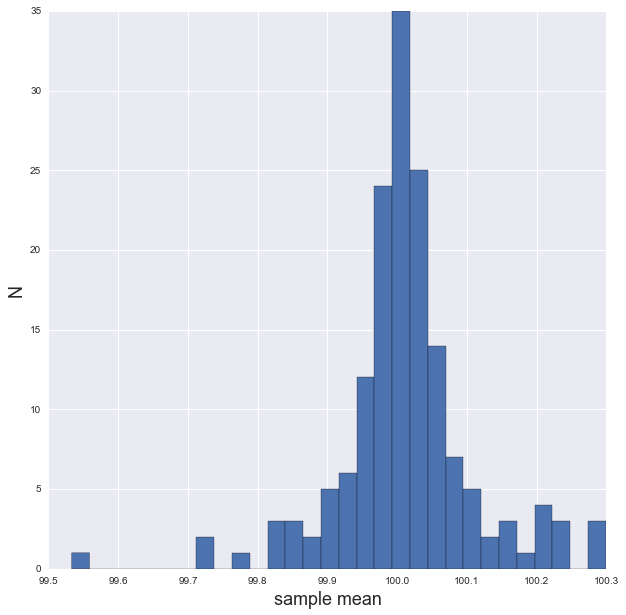

In [36]:
allmeans = list(md['norm']['means'].values())

normal_n = pl.figure(figsize = (10,10)).add_subplot(111)
normal_n.hist(allmeans, bins =30)
normal_n.set_xlabel('sample mean' ,fontsize =18)
normal_n.set_ylabel('N', fontsize = 18)

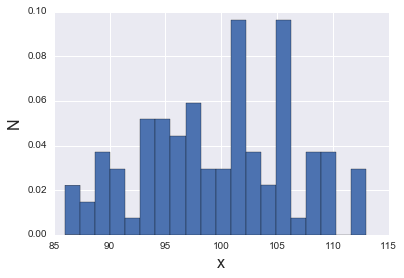

In [37]:
#Binomial Distribution

md['bi'] = np.random.binomial(200, 0.5, 100)


pl.hist(md['bi'], bins = 20, normed = True)
pl.ylabel('N', fontsize = 16)
pl.xlabel('x', fontsize = 16)

In [38]:
print ('Binomia mean : %.2f, standard deviation: %.2f' % (md['bi'].mean(), md['bi'].std()))

Binomia mean : 99.77, standard deviation: 6.64


In [87]:
md['bi'] = {}

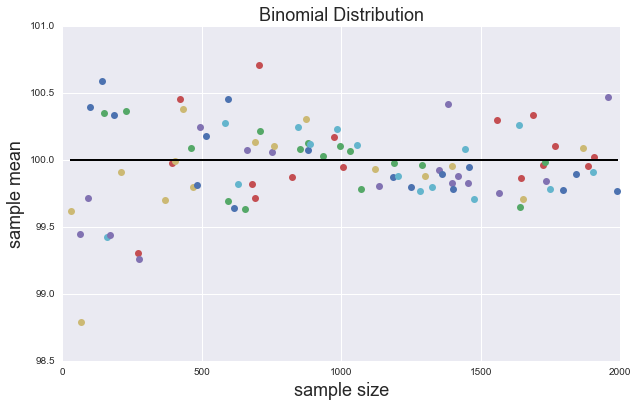

In [88]:
for n in mysize:
    md['bi'][n] = np.random.binomial(200,0.5,  size = n)

md['bi']['means'] = {}

axbio_n = pl.figure(figsize = (10,6)).add_subplot(111)
for nn in md['bi']:
    if not type(nn) == str:
        md['bi']['means'][nn] = md['bi'][nn].mean()
        axbio_n.plot(nn, md['bi']['means'][nn], 'o')
        axbio_n.set_xlabel('sample size', fontsize=18)
        axbio_n.set_ylabel('sample mean', fontsize=18)
        axbio_n.set_title('Binomial Distribution', fontsize=18)
        axbio_n.plot([min(mysize), max(mysize)], [100, 100], 'k')


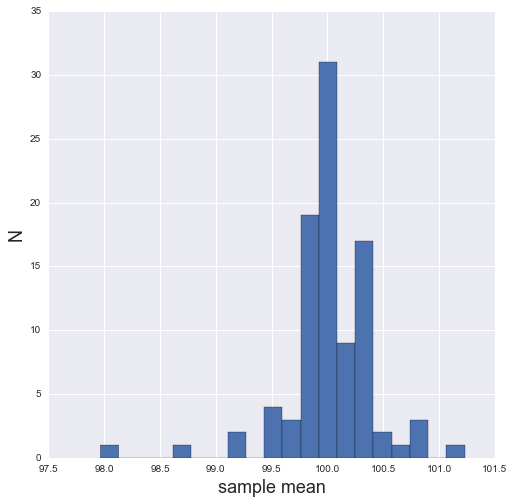

In [41]:
allmeans = list(md['bi']['means'].values())

pl.figure(figsize=(8,8))
pl.hist(allmeans, bins = 20)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

In [ ]:
#Poisson Distribution

In [ ]:
md = {}

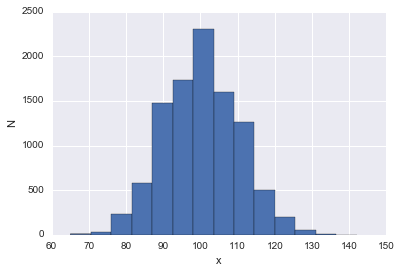

In [76]:


md['poi'] = np.random.poisson(100, size=10000)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['poi'], bins = 14)
pl.ylabel('N')
pl.xlabel('x')

In [43]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['poi'].mean(), md['poi'].std()))

Poisson mean: 99.92, standard deviation: 10.10


In [79]:
md['poi'] = {}

In [80]:
for n in mysize:
    md['poi'][n] = np.random.poisson(100, size = n)


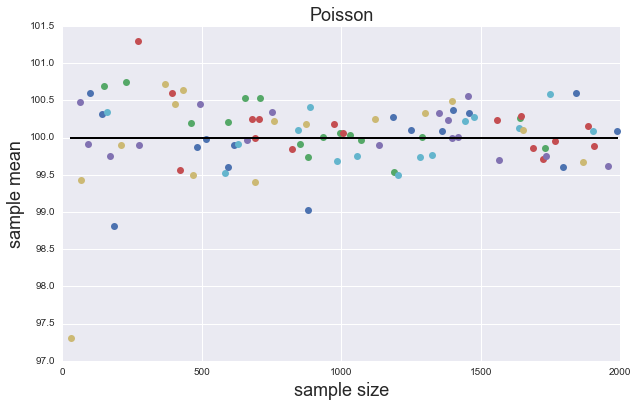

In [81]:
md['poi']['means'] = {}
axpoi_n = pl.figure(figsize = (10,6)).add_subplot(111)

for nn in md['poi']:
    if not type(nn) == str:
        md['poi']['means'][nn] = md['poi'][nn].mean()
        #and plot it
        axpoi_n.plot(nn, md['poi']['means'][nn], 'o')
        axpoi_n.set_xlabel('sample size', fontsize=18)
        axpoi_n.set_ylabel('sample mean', fontsize=18)
        axpoi_n.set_title('Poisson', fontsize=18)
        axpoi_n.plot([min(mysize), max(mysize)], [df, df], 'k')


In [ ]:
#Geometric Distribution

In [47]:
df = mymean

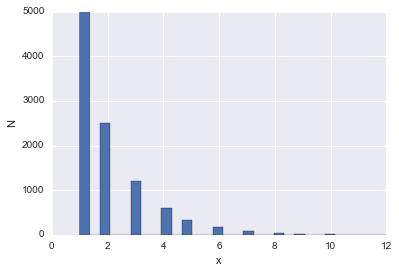

In [48]:
md = {}
# md is an empty disctionary
md['geom'] = np.random.geometric(0.5, size=10000)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['geom'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [49]:
print ("Geometric mean: %.2f, standard deviation: %.2f"%(md['geom'].mean(), md['geom'].std()))

Geometric mean: 2.01, standard deviation: 1.44


In [50]:
p = 1.0 / df

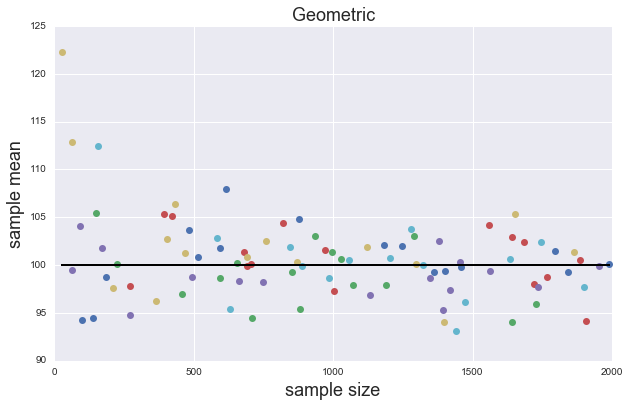

In [90]:
md['geom'] = {} 



for n in mysize:
    md['geom'][n] = np.random.geometric(0.01, size = n)
    
# save the means for plotting later    

md['geom']['means'] = {}
axgeo_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['geom']:
    if not type(nn) == str:
        md['geom']['means'][nn] = md['geom'][nn].mean()
        #and plot it
        axgeo_n.plot(nn, md['geom']['means'][nn], 'o')
        axgeo_n.set_xlabel('sample size', fontsize=18)
        axgeo_n.set_ylabel('sample mean', fontsize=18)
        axgeo_n.set_title('Geometric', fontsize=18)
        axgeo_n.plot([min(mysize), max(mysize)], [df, df], 'k')

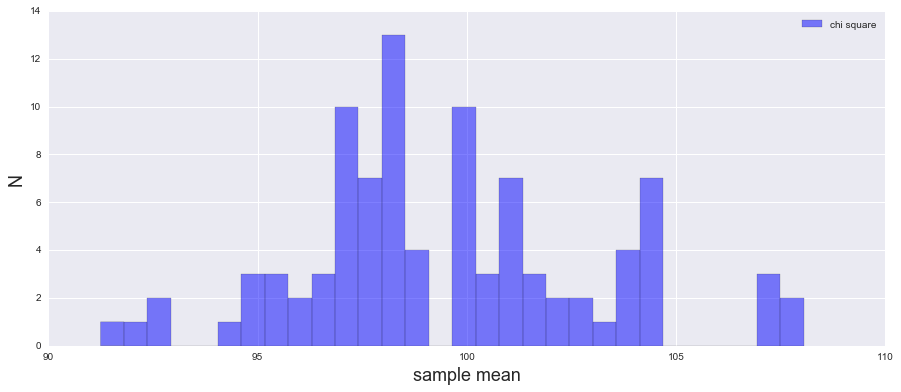

In [53]:
allmeans=md['geom']['means'].values()
a=pl.figure(figsize=(15, 6)).add_subplot(111)
a.hist(allmeans, bins=30,color='blue',label='chi square',alpha=0.5)  
a.set_xlabel('sample mean', fontsize = 18)
a.set_ylabel('N', fontsize = 18)
a.legend()


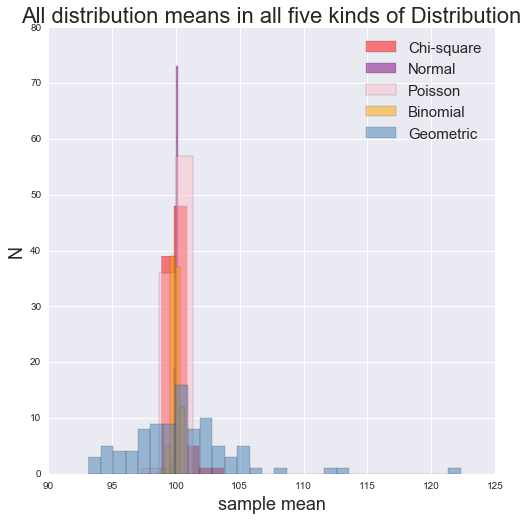

In [91]:
allmeans_1 = list(md['chisq']['means'].values())
allmeans_2 = list(md['norm']['means'].values())
allmeans_3 = list(md['poi']['means'].values())
allmeans_4 = list(md['bi']['means'].values())
allmeans_5 = list(md['geom']['means'].values())

pl.figure(figsize=(8, 8))

pl.hist(allmeans_1, bins=5, color = 'red', alpha = 0.5, label = "Chi-square")
pl.hist(allmeans_2, bins=3, color = 'purple', alpha = 0.5, label = "Normal")
pl.hist(allmeans_3, bins=3, color='pink', alpha = 0.5, label = "Poisson")
pl.hist(allmeans_4, bins=5, color='orange', alpha = 0.5, label = "Binomial")
pl.hist(allmeans_5, bins=30, color = 'steelBlue', alpha = 0.5, label = "Geometric")

pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(fontsize=15)
pl.title("All distribution means in all five kinds of Distribution", fontsize = 22)
pl.show()